## Problem Set 3
Daniela Santos Cárdenas, Ana Brás Monteiro

In [214]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [241]:
# Import data 

df = pd.read_stata("../data/PS2_Data.dta")

# indiv - individual ID
# age
# SchD - schooling decision
# WhCoD - white collar work decision
# BlCoD - blue collar work decision
# SchE - school experience
# WhCoE - white collar work experience
# BlCoE - blue collar work experience


In [219]:
df.head()

,indiv,age,SchD,WhCoD,BlCoD,SchE,WhCoE,BlCoE
0,1,1,1,0,0,10,0,0
1,1,2,0,1,0,11,0,0
2,1,3,1,0,0,11,1,0
3,1,4,0,1,0,12,1,0
4,1,5,1,0,0,12,2,0


### Question 1
Replicate Table 1 (choice distribution) and 2 (transition matrix) from Keane & Wolpin (1997). Reproduce a line graph similar to Figure 1, with a line for each career option. 

What can you say about the relationship between age and choices? What about persistence and state dependence? 

In [220]:
# Table 1 simply shows number of observations and percentages of individuals at each age that chose school, home, white-collar,  blue-collar, miilitary, total

table1 = df.groupby('age') \
        .agg(School_mean = ('SchD', 'mean'), School_sum = ('SchD', 'sum'), White_mean = ('WhCoD', 'mean'), White_sum = ('WhCoD', 'sum'), Blue_mean = ('BlCoD', 'mean'), Blue_sum = ('BlCoD', 'sum'), Total_mean = ('age', 'nunique'), Total_sum = ('age', 'count')) 

# Wasn't really figuring out how to do the total_mean, but this should just be =1, since it's just the sum of all the other %, so that just sums to 1

In [221]:
table1.columns =['School (Mean)', 'School (Sum)', 'White-Collar (Mean)', 'White-Collar (Sum)', 'Blue-Collar (Mean)', 'Blue-Collar (Sum)', 'Total (Mean)', 'Total(Sum)']

table1

,School (Mean),School (Sum),White-Collar (Mean),White-Collar (Sum),Blue-Collar (Mean),Blue-Collar (Sum),Total (Mean),Total(Sum)
age,,,,,,,,
1,0.442,221.0,0.266,133.0,0.292,146.0,1,500
2,0.398,199.0,0.284,142.0,0.318,159.0,1,500
3,0.370,185.0,0.330,165.0,0.300,150.0,1,500
4,0.328,164.0,0.356,178.0,0.316,158.0,1,500
5,0.298,149.0,0.354,177.0,0.348,174.0,1,500
6,0.244,122.0,0.390,195.0,0.366,183.0,1,500
7,0.244,122.0,0.354,177.0,0.402,201.0,1,500
8,0.190,95.0,0.390,195.0,0.420,210.0,1,500
9,0.182,91.0,0.392,196.0,0.426,213.0,1,500


In [242]:
# Table 2 is the transition matrix, so we need lags
df['LagSchD'] = df.groupby('indiv')['SchD'].shift(1)
df['LagWhCoD'] = df.groupby('indiv')['WhCoD'].shift(1)
df['LagBlCoD'] = df.groupby('indiv')['BlCoD'].shift(1)

In [243]:
# "The first figure in each cell is the percentage
# of transitions from origin to destination (the row percentage) and
# the second the reverse, that is, the percentage in a particular destination 
# who started from each origin (column percentage)."

# Row percentage

def table2_row(t , t_1):
    row = df.loc[(t == 1) & (t_1 == 1),].shape[0] / df.loc[(t_1 == 1) & (df.age !=1),].shape[0] 
    return row

# Column percentage

def table2_col(t , t_1):
    col = df.loc[(t == 1) & (t_1 == 1),].shape[0] / df.loc[(t == 1) & (df.age !=1),].shape[0] 
    return col



In [ ]:
# Let's create our table 

table2 = pd.DataFrame()

for t_1 in [df.LagSchD, df.LagWhCoD, df.LagBlCoD]:
    row = []
    col = []

    for t in [df.SchD, df.WhCoD, df.BlCoD]:
        row.append(round(table2_row(t, t_1), 2))
        col.append(round(table2_col(t, t_1), 2))

    table2 = table2.append(pd.DataFrame(row).T)
    table2 = table2.append(pd.DataFrame(col).T)

table2


In [305]:
# Naming columns and rows 
table2.columns = ['School', 'White Collar',
                'Blue Collar']

choices = ['School (Row)', 'School (Col)', 'White Collar (Row)', 'White Collar (Col)', 'Blue Collar (Row)', 'Blue Collar (Col)']
table2.insert(0, 'Choice (t-1)', choices)

In [307]:
table2

,Choice (t-1),School,White Collar,Blue Collar
0,School (Row),0.25,0.37,0.38
0,School (Col),0.28,0.31,0.31
0,White Collar (Row),0.27,0.41,0.31
0,White Collar (Col),0.36,0.39,0.30
0,Blue Collar (Row),0.27,0.32,0.41
0,Blue Collar (Col),0.36,0.31,0.40


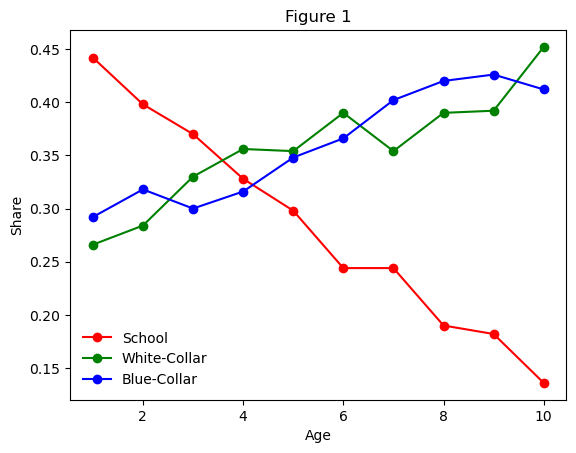

In [239]:
# Figure 1 percentage of people who chose school, wc and bc by age
table1.reset_index(inplace=True)

plt.plot(table1['age'], table1['School (Mean)'], color='red', marker='o')
plt.plot(table1['age'], table1['White-Collar (Mean)'], color='green', marker='o')
plt.plot(table1['age'], table1['Blue-Collar (Mean)'], color='blue', marker='o')
plt.title('Figure 1')
plt.xlabel('Age')
plt.ylabel('Share')
plt.legend(['School', 'White-Collar', 'Blue-Collar'], frameon = False)
plt.show()

The share of people in school decreases with age, naturally. At the same time, the share of people in white-collar and blue-collar jobs increases with age.